# **WEEK 3 B!gTh!nkAI - MANIPULATING DATA AND CREATING A MACHINE LEARNING MODEL**

Crediting:

*   https://medium.com/mlearning-ai/machine-learning-project-with-linear-regression-algorithm-b433d770fefd --> where idea came from
*   https://www.kaggle.com/datasets/mirichoi0218/insurance/ --> where dataset came from (KAGGLE IS QUITE USEFUL FOR FINDING DATA SETS)

**LINK FOR THE DATASET TO DOWNLOAD:** https://drive.google.com/file/d/18K67twkqwQeVSFvXfZ7OAnHc2a7N2mNF/view?usp=drive_link

## **STEP 1: Loading the Dataset**

In [3]:
# allows importing of file
from google.colab import files

files.upload()

Saving insurance.csv to insurance.csv


{'insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,southwe

In [4]:
# import pandas
import pandas as pd

# read the csv file
df = pd.read_csv('insurance.csv')

# display first 5 rows of data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **STEP 2: Understanding the Data**

In [5]:
print("Data shape:")
# shows (rows, columns)
df.shape

Data shape:


(1338, 7)

In [6]:
print("Data type info:")
 # shows data types for each column
df.info()

Data type info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# check for null data spots. Should be none :-)
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [8]:
# sums all null data if there are any
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [9]:
# displays data types which is important when creating ML model
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


# **STEP 3: Data Preprocessing**

In [10]:
# convert the data types to category types
df["sex"] = df["sex"].astype('category')
df["smoker"] = df["smoker"].astype('category')
df["region"] = df["region"].astype('category')

# check that data types successfully converted
df.dtypes

,0
age,int64
sex,category
bmi,float64
children,int64
smoker,category
region,category
charges,float64


In [11]:
# describe the data to see what it looks like now
#df.describe()

# transpose data (easier to understand)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# **STEP 4: Data Visualization**
This step is not required but certainly helps with improving skills and showing data to non-technical users

In [12]:
# seaborn is a library that builds on matplotlib, which is just like a matlab library
import seaborn as sns

# sets the style of the graph
sns.set_style("whitegrid")

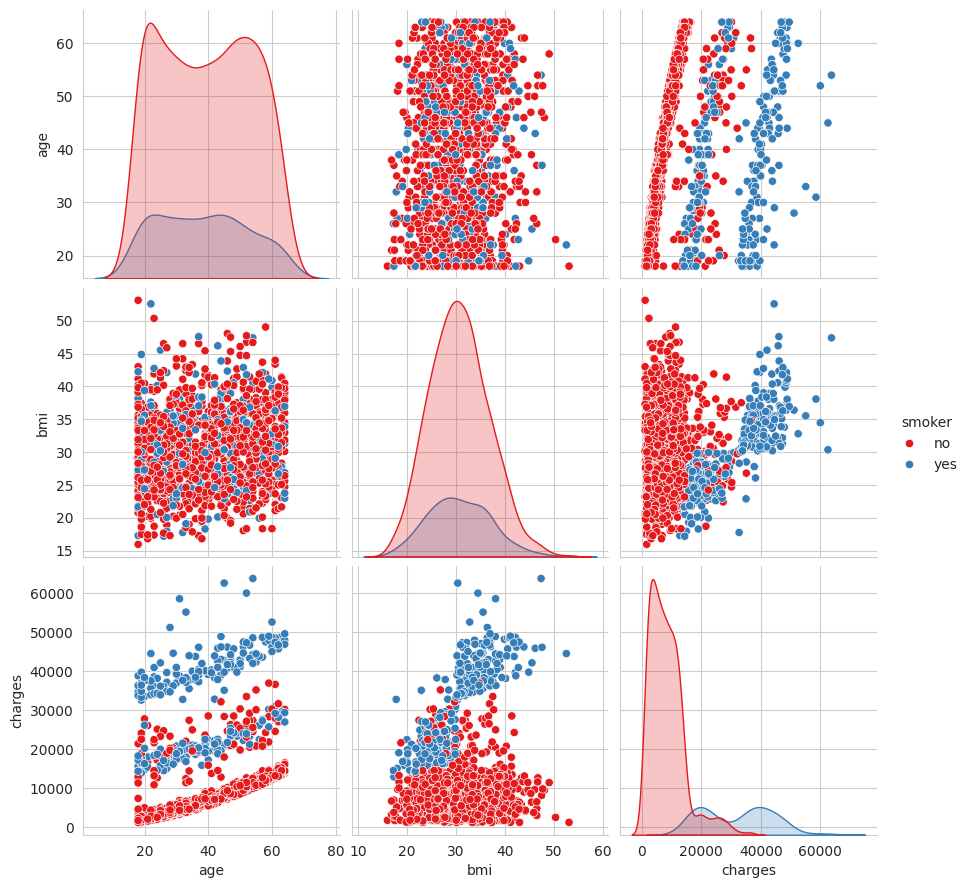

In [13]:
# creating a pairplot to show relationships between
sns.pairplot(
    df[["age", "bmi", "charges", "smoker"]], #[[]] is for pandas DATAFRAMES, [] is for pandas SERIES
    hue = "smoker",
    height = 3,
    palette = "Set1")

<Axes: >

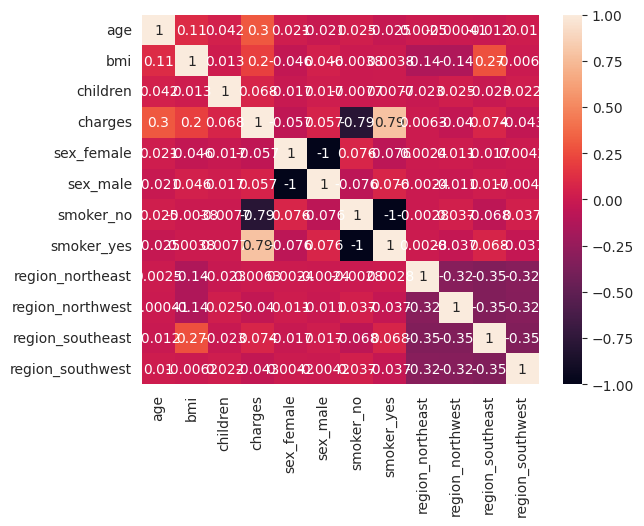

In [17]:
# use heatmap to display data; shows how there is an positive correlation between different variables
sns.heatmap(df.corr(), annot= True)

## **THE MANDATORY LABELING**

In [15]:
# Dummies are required for one-hot encoding which is substituting numbers in for categories
# This is why we changed the data types from 'object' to 'category'
df = pd.get_dummies(df)

# display updated columns
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

# **STEP 5: Building Regression Model**
Linear regression is the most simple type of ML model so we will start with that for this notebook

In [16]:
# setting output variable (dependent variable) i.e. the value we WANT TO PREDICT
y = df["charges"]

# dropping the outpur var leaves us with only features that we will train the model on
X = df.drop("charges", axis = 1)

In [18]:
# split the data into training and testing datasets. This is completed easiest with scikit-learn
from sklearn.model_selection import train_test_split

In [ ]:
# split the sets into 80% training, 20% testing
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    train_size = 0.80,
    random_state = 1)

In [ ]:
# import LR library
from sklearn.linear_model import LinearRegression

# build instance of LR
lr = LinearRegression()

# BUILD THE MODEL
lr.fit(X_train,y_train)

LinearRegression()

# **STEP 6: Evaluating the Model**


In [ ]:
# see percent accuracy against training data
lr.score(X_train,y_train)

0.7477680686451551

In [ ]:
# see percent accuracy against testing data
lr.score(X_test,y_test)

0.7623311844057111

# **STEP 7: Predicting with the Model**

In [ ]:
# select first row of data
data_new = X_train[:2]

# predicts first row of data
print("Prediction: ")
print(lr.predict(data_new))

# actual first row of data
print("Actual:")
print(y_train[:2])

Prediction: 
[10508.41885042  8494.95651816]
Actual:
216    10355.641
731    10065.413
Name: charges, dtype: float64
